# Interesting/Final Data Cleaning Process
In this notebook, you will find the data cleaning methods I applied to the datasets before training the models. The cleaning steps are crucial to ensure the quality of the data and to enhance the performance of the model. These steps include handling missing values, removing irrelevant columns, and preparing the dataset for model training.

_This notebook was created by Huma Raja Liaqat_


The explanation of the code is available in the previous two cleaning notebooks.
For the final cleaning, I didn't use the Z-score method because I observed that it had no significant impact, so I decided to leave it out.


First rows of dataset:

First rows of dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 11021 entries, 1980-12-12 to 2024-08-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_AAPL  11021 non-null  float64
 1   Close_AAPL      11021 non-null  float64
 2   High_AAPL       11021 non-null  float64
 3   Low_AAPL        11021 non-null  float64
 4   Open_AAPL       11021 non-null  float64
 5   Volume_AAPL     11021 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 602.7+ KB


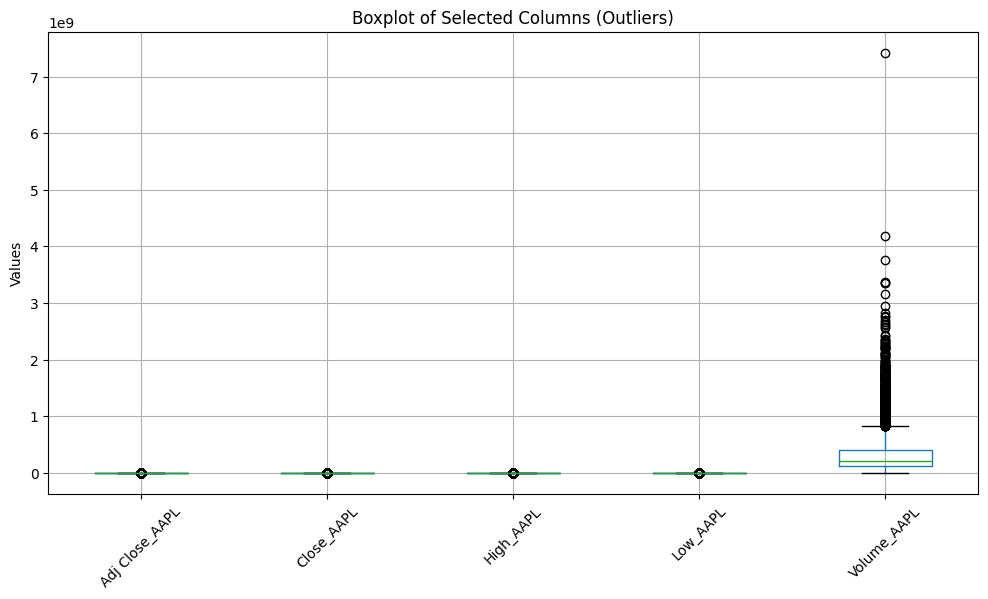

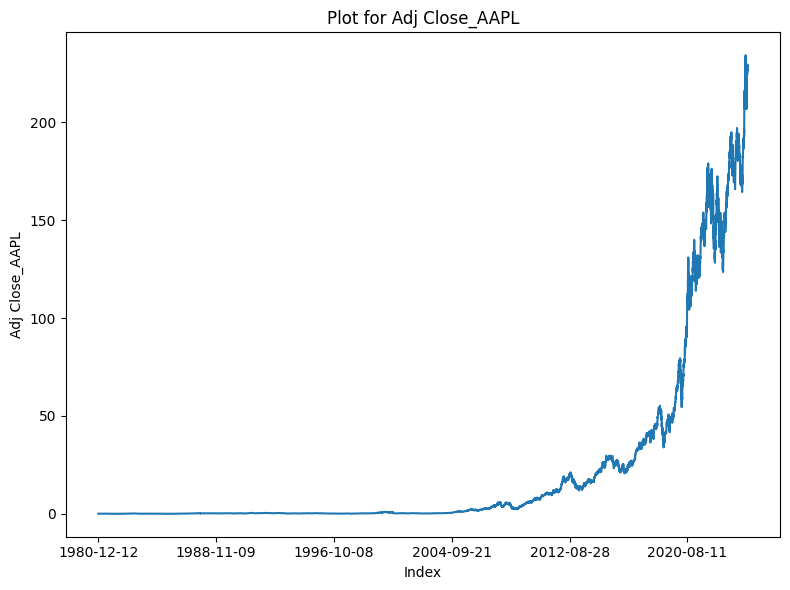

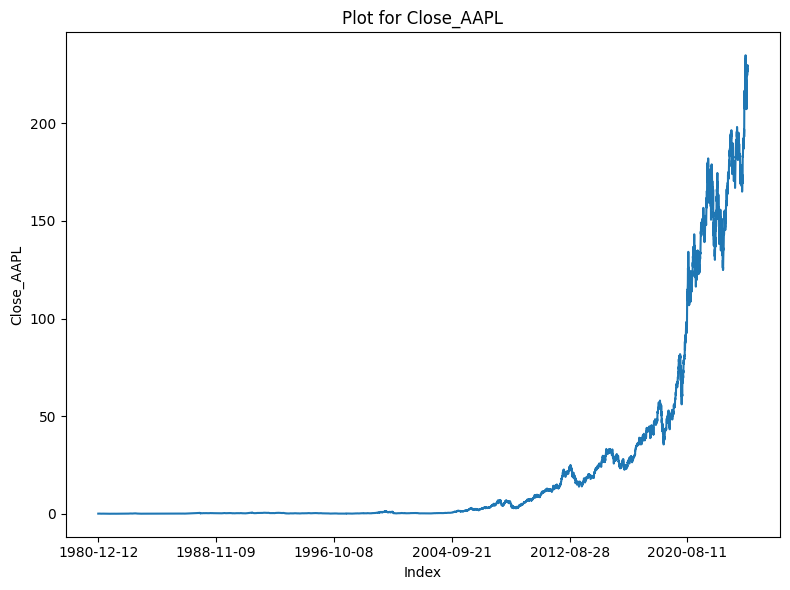

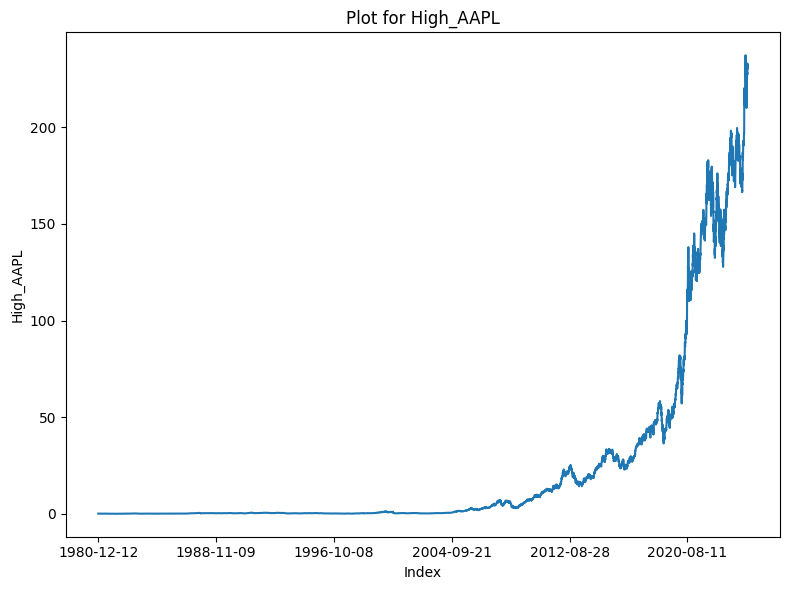

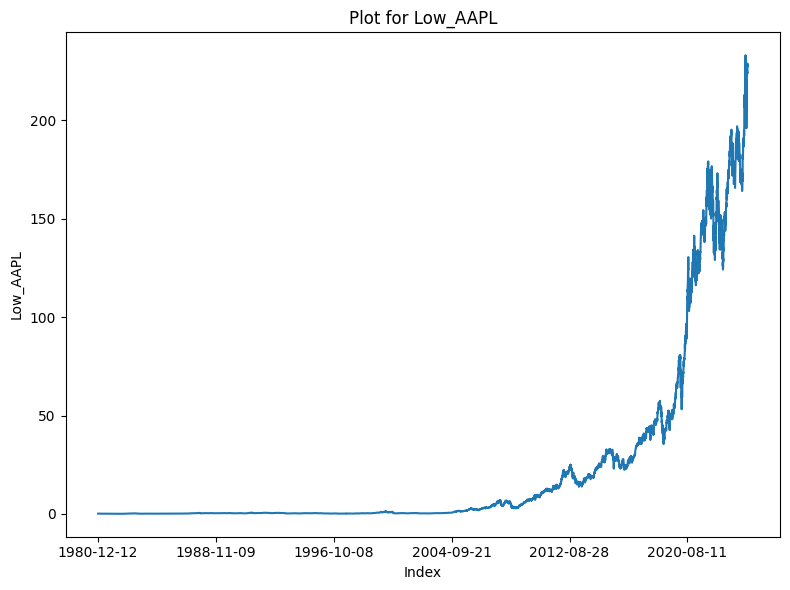

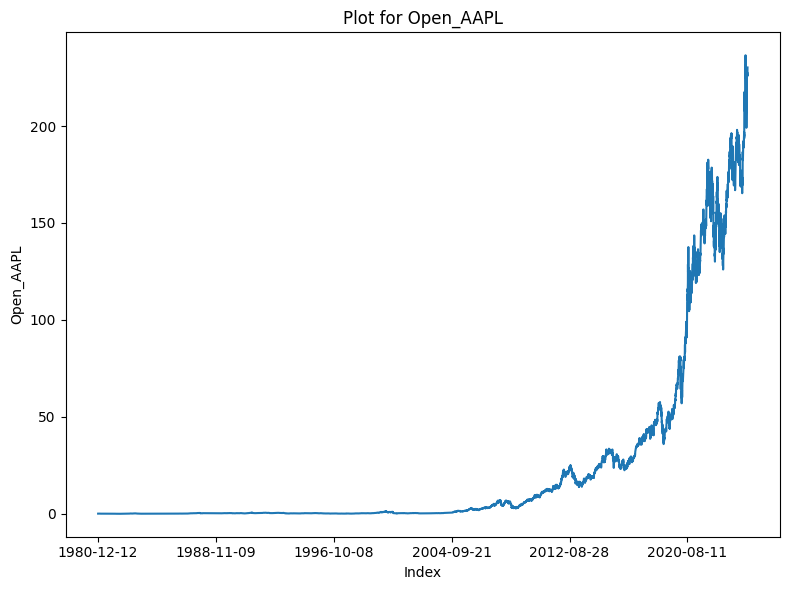

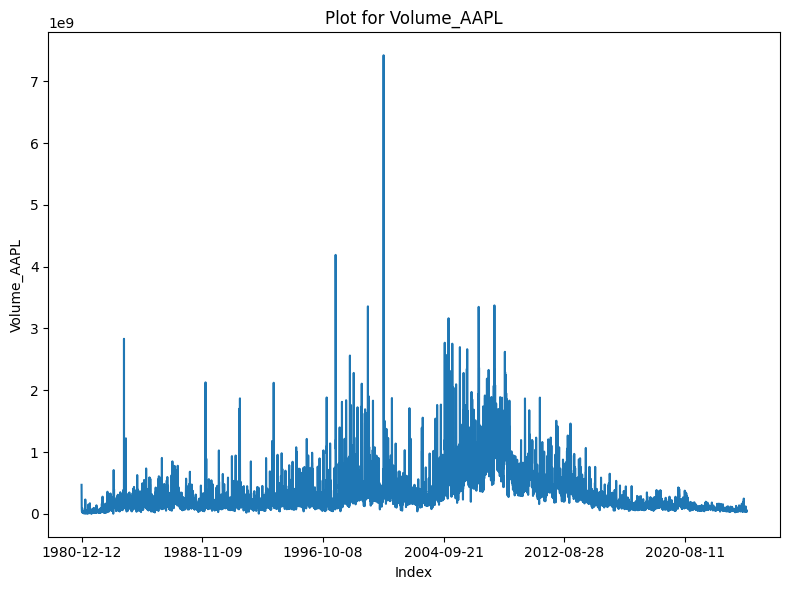

<class 'pandas.core.frame.DataFrame'>
Index: 8711 entries, 1980-12-12 to 2019-06-03
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_AAPL  8711 non-null   float64
 1   Close_AAPL      8711 non-null   float64
 2   High_AAPL       8711 non-null   float64
 3   Low_AAPL        8711 non-null   float64
 4   Open_AAPL       8711 non-null   float64
 5   Volume_AAPL     8711 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 476.4+ KB
None


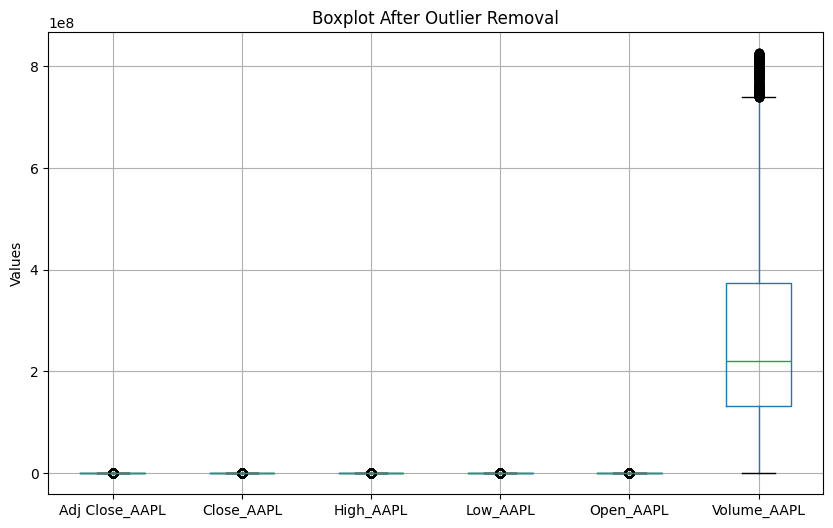

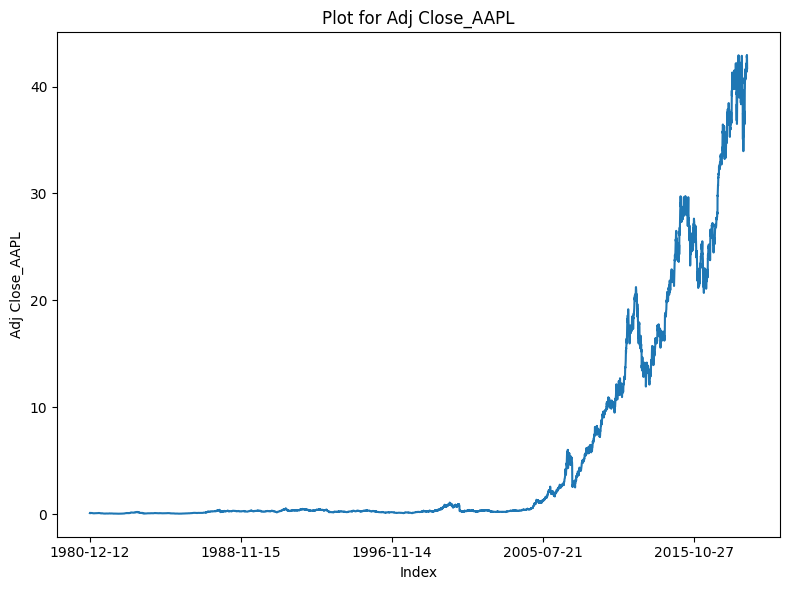

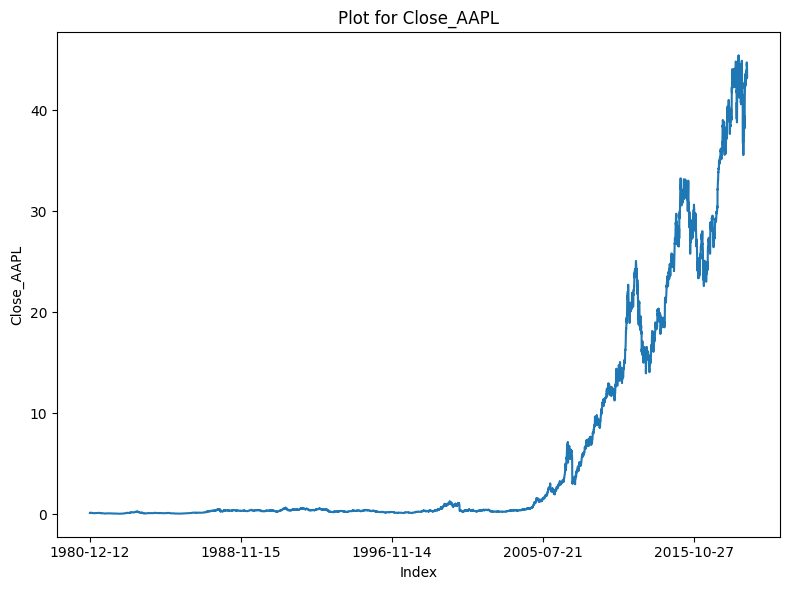

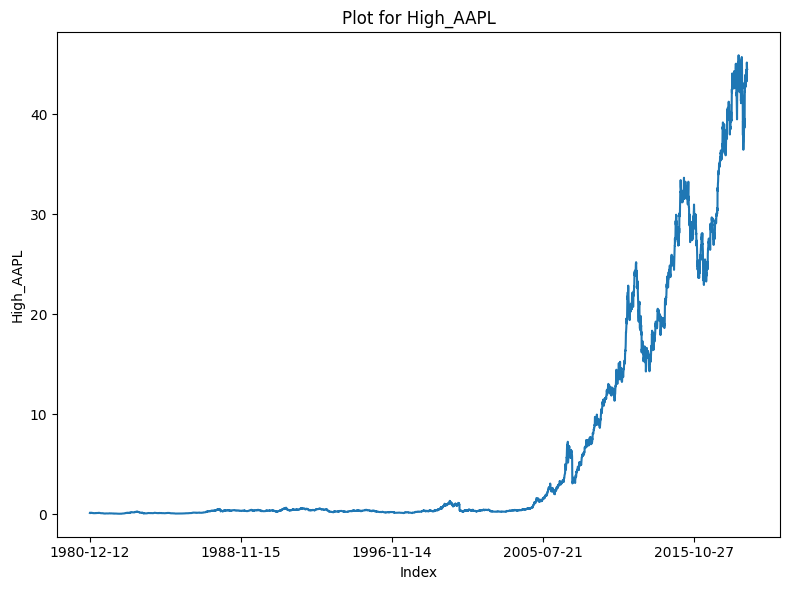

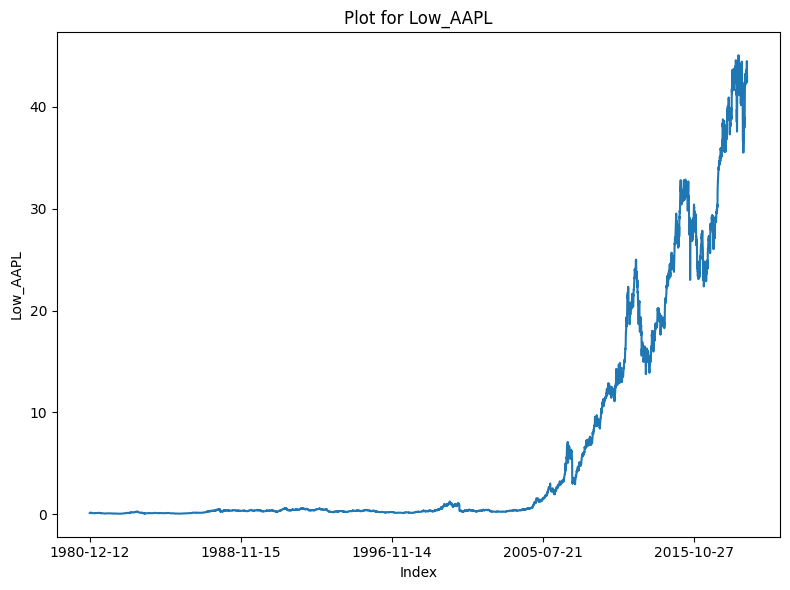

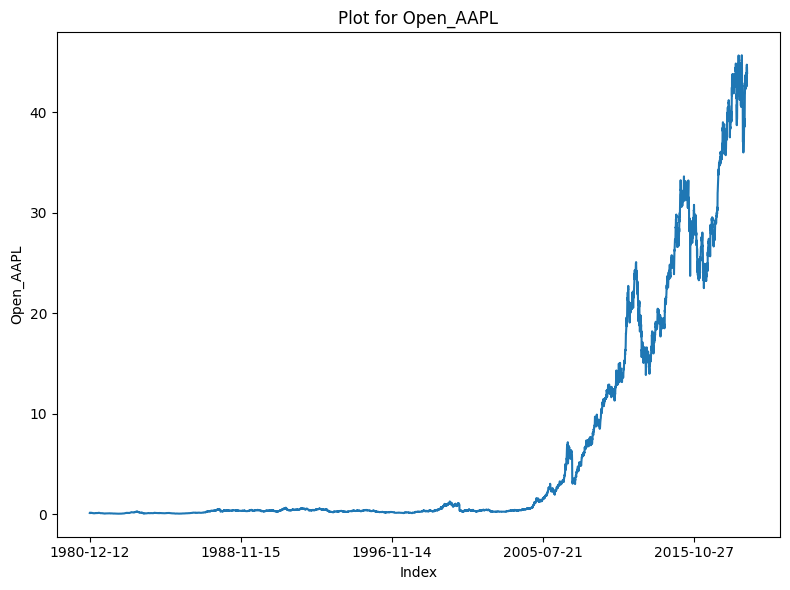

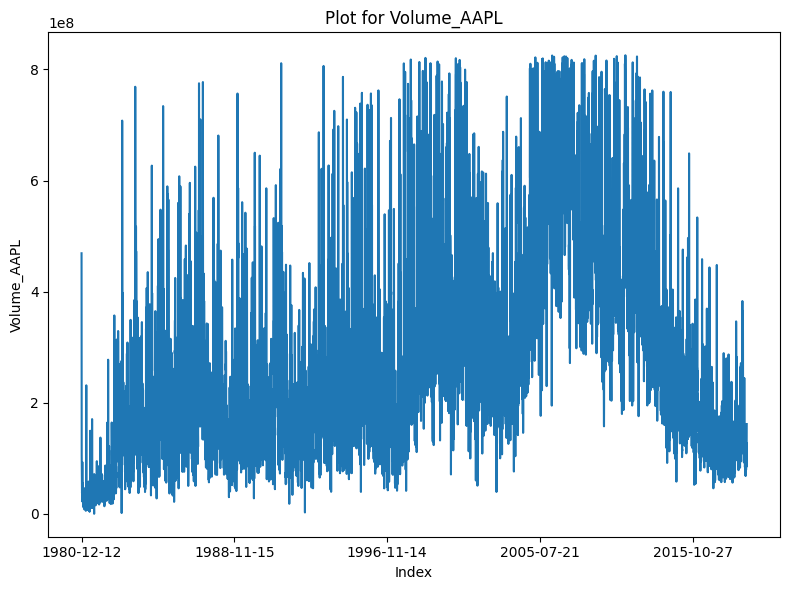

Index(['adj close_aapl', 'close_aapl', 'high_aapl', 'low_aapl', 'open_aapl',
       'volume_aapl'],
      dtype='object')
Index Name: date


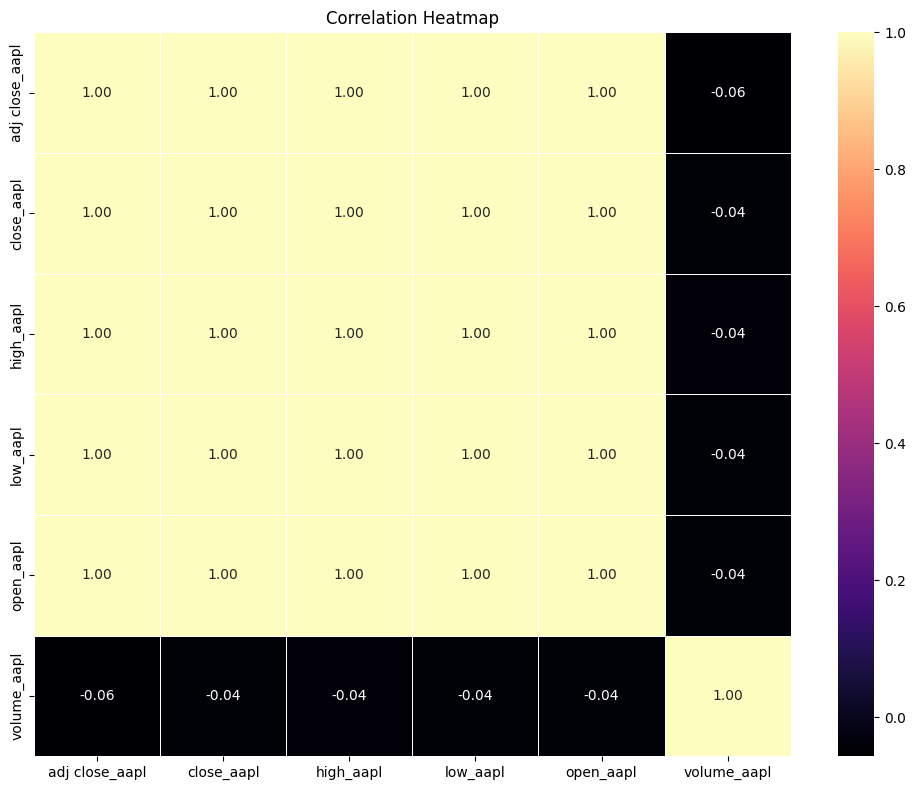

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = 'apple_stock.csv' 
df = pd.read_csv(data, header=[0, 1], index_col=0) 

df.columns
df.columns = [col[1] if 'Unnamed' in col[0] else f"{col[0]}_{col[1]}" for col in df.columns]
print("\nFirst rows of dataset:")
df.head()
print("\nFirst rows of dataset:")
df.head()
df.describe()
df.info()

columns_to_analyze = ['Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']

plt.figure(figsize=(12, 6))
df[columns_to_analyze].boxplot()
plt.title('Boxplot of Selected Columns (Outliers)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

for column in df.columns:
    plt.figure(figsize=(8, 6))  
    df[column].plot(kind='line') 
    plt.title(f"Plot for {column}") 
    plt.xlabel('Index') 
    plt.ylabel(column)  
    plt.tight_layout()  
    plt.show() 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_no_outliers.info())

plt.figure(figsize=(10, 6))
df_no_outliers.boxplot()
plt.title("Boxplot After Outlier Removal")
plt.ylabel("Values")
plt.show()

for column in df.columns:
    plt.figure(figsize=(8, 6)) 
    df_no_outliers[column].plot(kind='line') 
    plt.title(f"Plot for {column}") 
    plt.xlabel('Index')
    plt.ylabel(column) 
    plt.tight_layout() 
    plt.show()  

df_no_outliers.columns = df_no_outliers.columns.str.lower()

df_no_outliers.index.name = df_no_outliers.index.name.lower()

print(df_no_outliers.columns)  
print("Index Name:", df_no_outliers.index.name) 

corr_matrix = df_no_outliers.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

df_no_outliers.to_csv('AAPL_cleaned_data.csv')


First rows of dataset:

First rows of dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 9695 entries, 1986-03-13 to 2024-08-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_MSFT  9695 non-null   float64
 1   Close_MSFT      9695 non-null   float64
 2   High_MSFT       9695 non-null   float64
 3   Low_MSFT        9695 non-null   float64
 4   Open_MSFT       9695 non-null   float64
 5   Volume_MSFT     9695 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 530.2+ KB


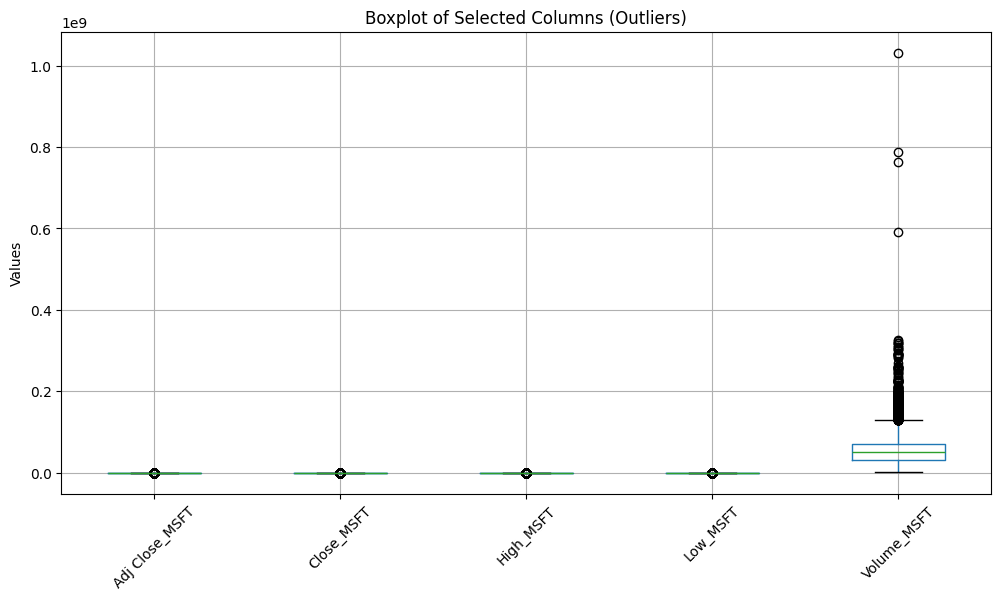

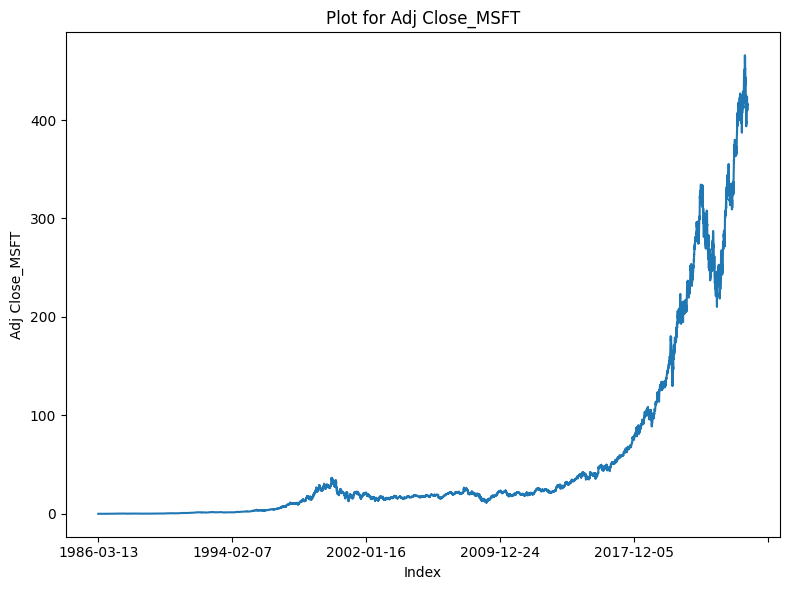

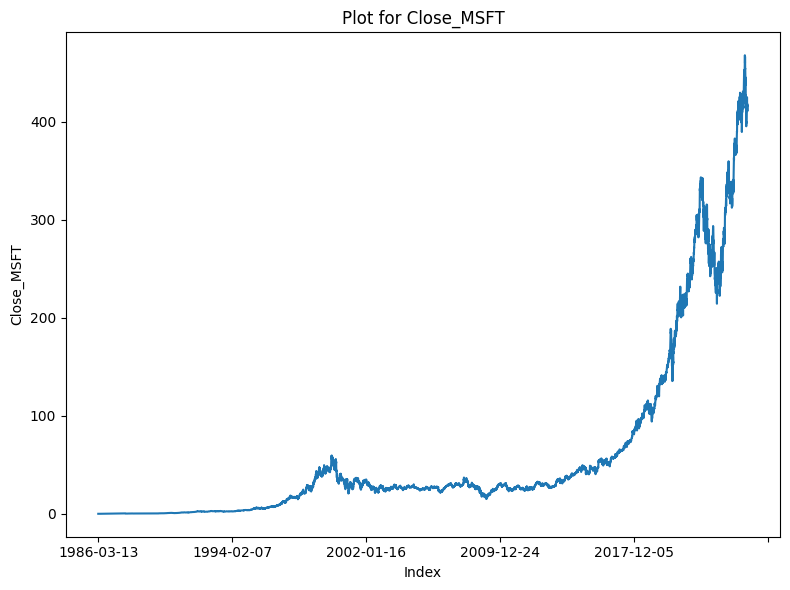

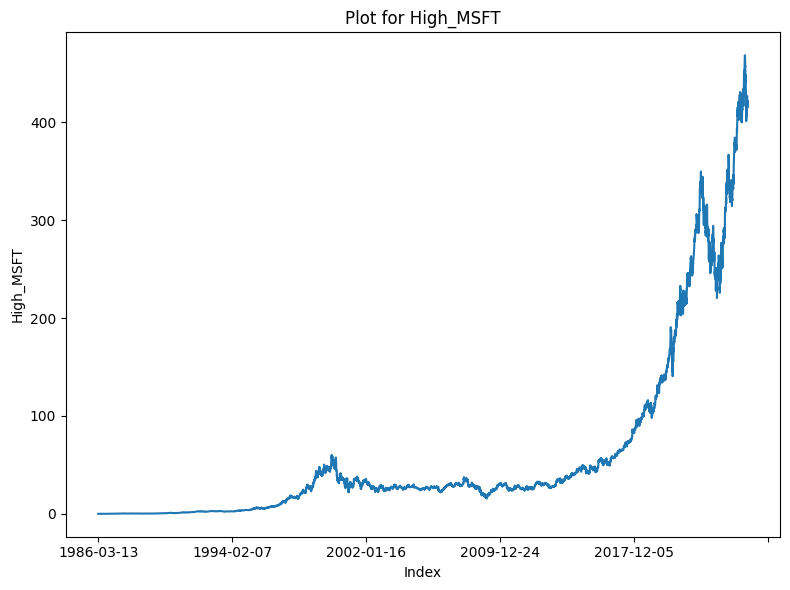

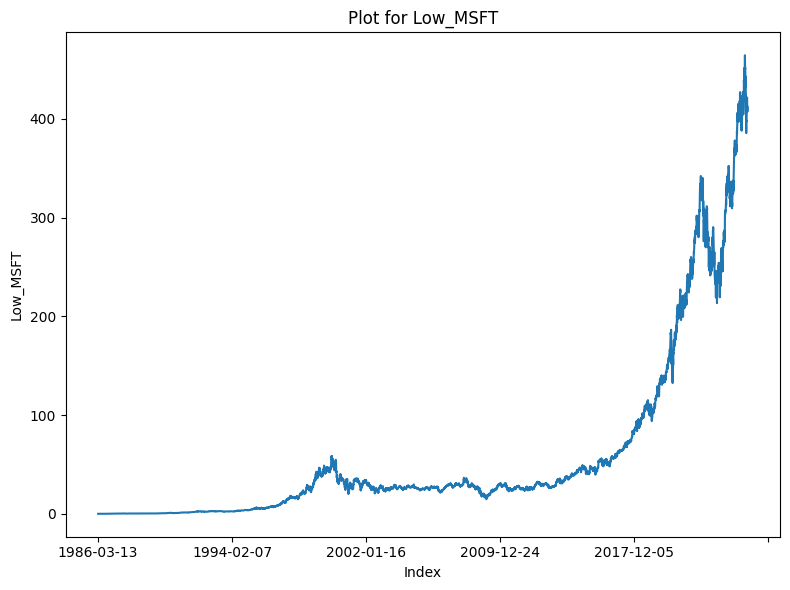

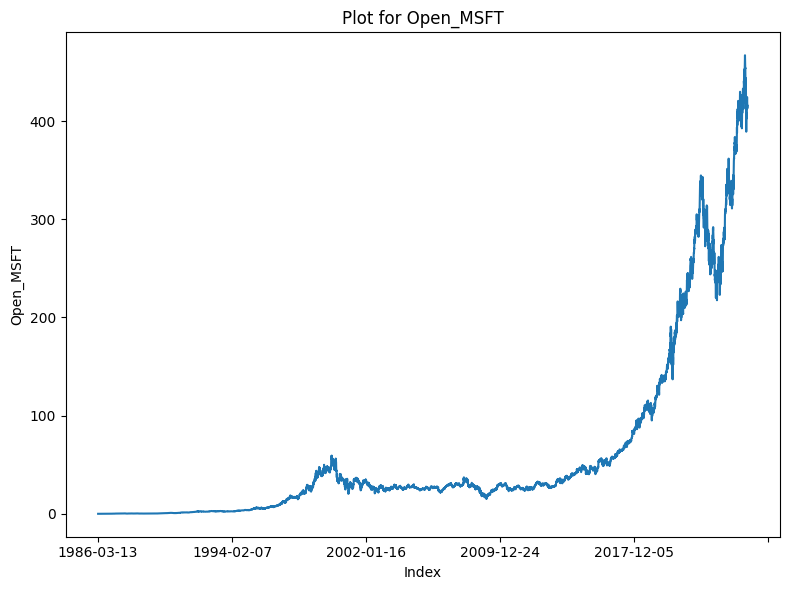

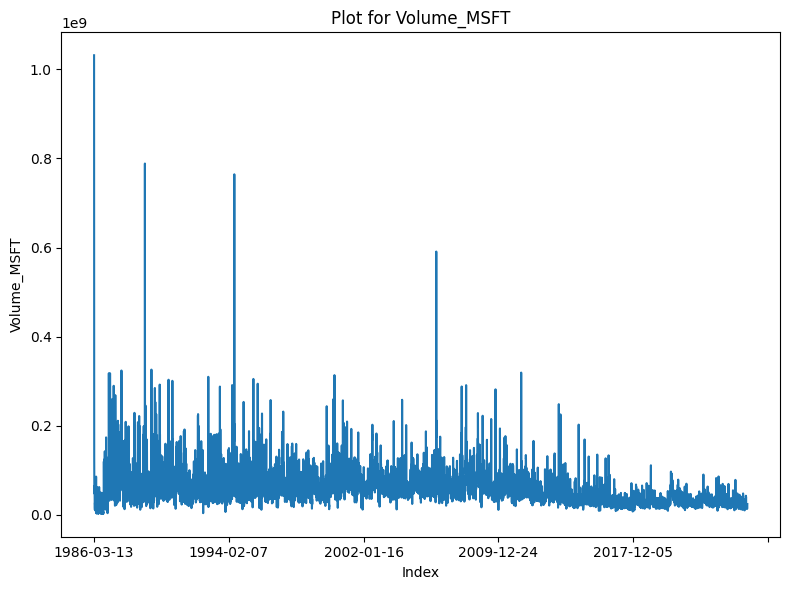

<class 'pandas.core.frame.DataFrame'>
Index: 7746 entries, 1986-03-18 to 2018-12-24
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_MSFT  7746 non-null   float64
 1   Close_MSFT      7746 non-null   float64
 2   High_MSFT       7746 non-null   float64
 3   Low_MSFT        7746 non-null   float64
 4   Open_MSFT       7746 non-null   float64
 5   Volume_MSFT     7746 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 423.6+ KB
None


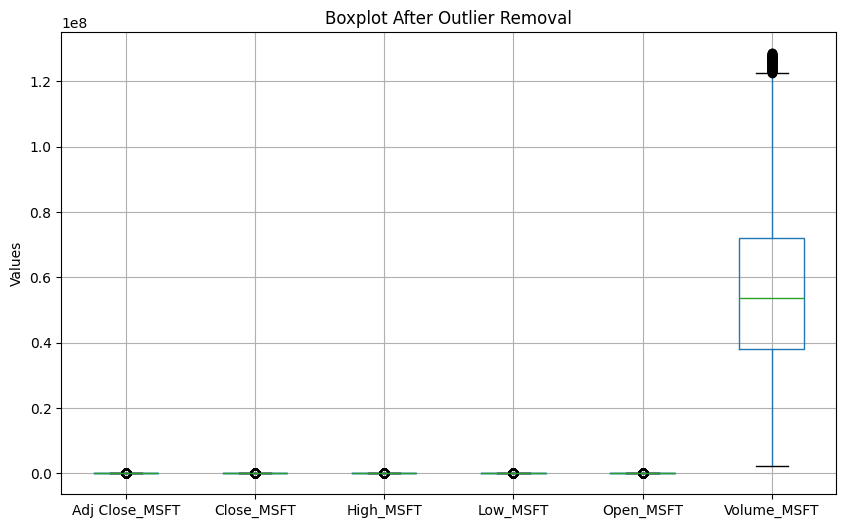

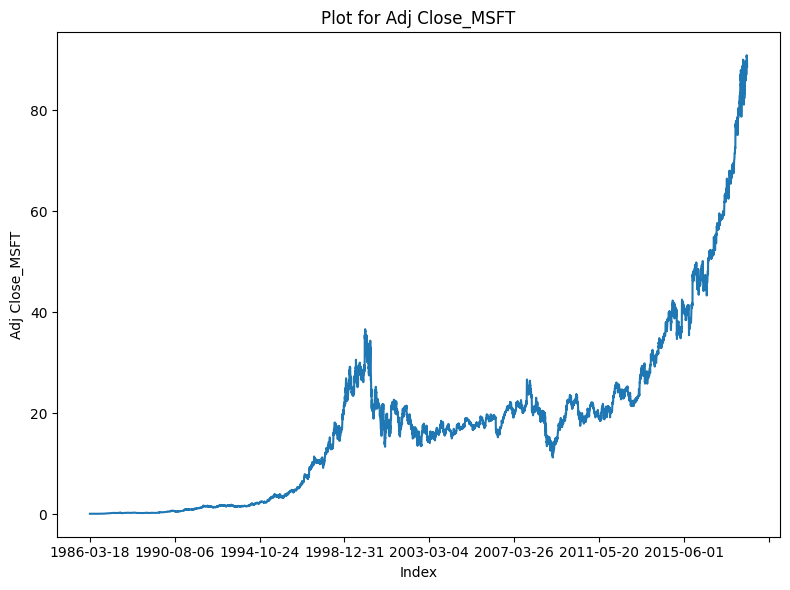

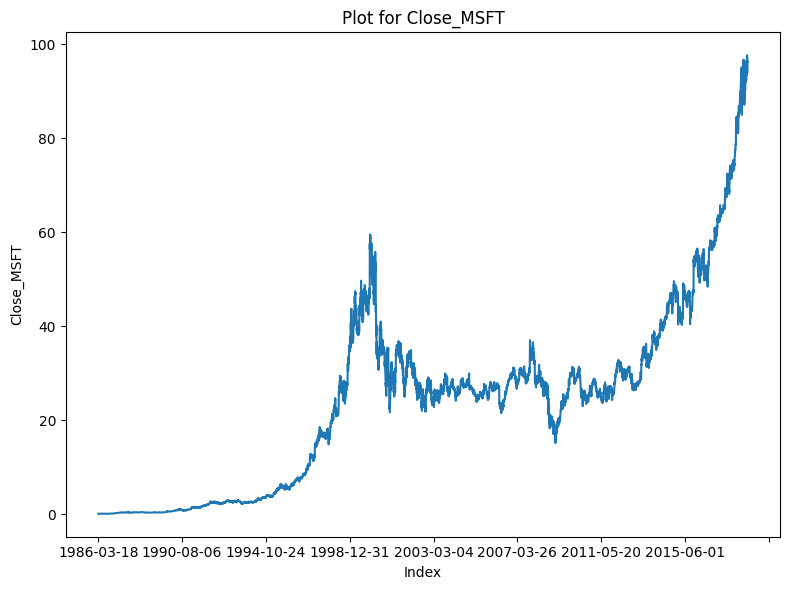

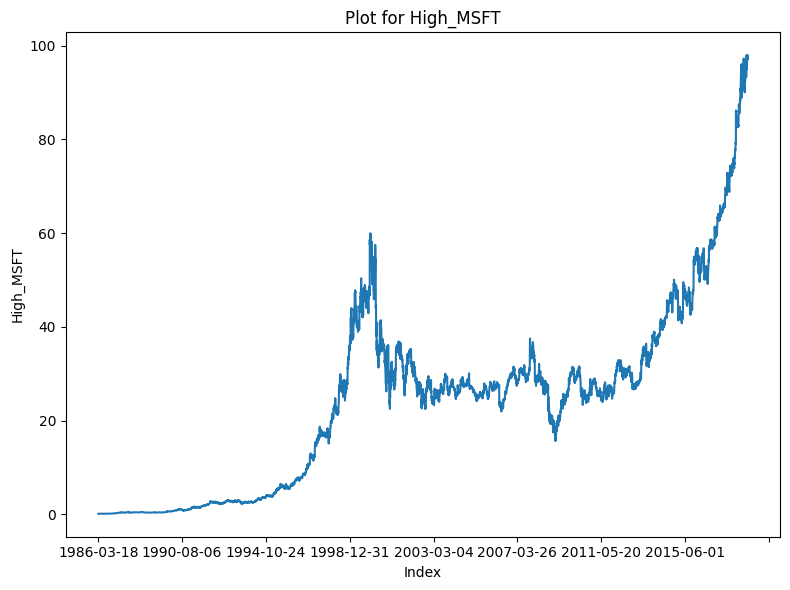

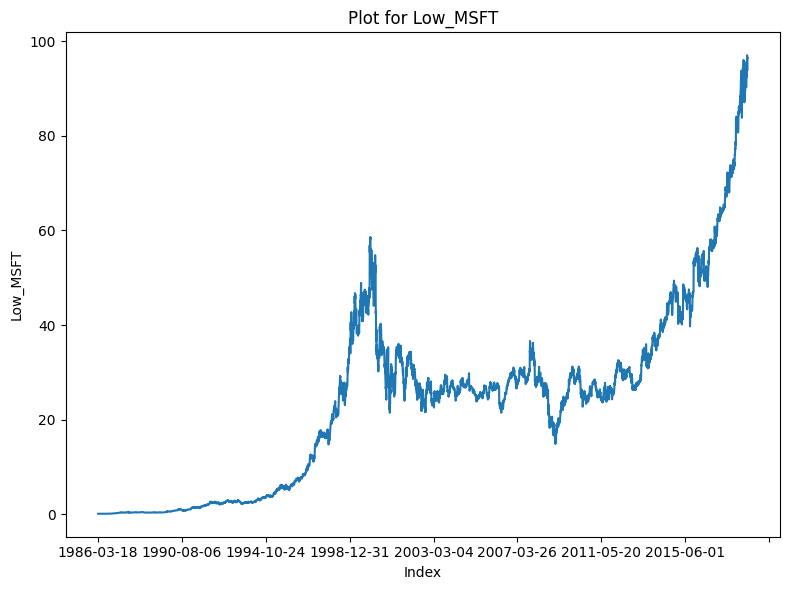

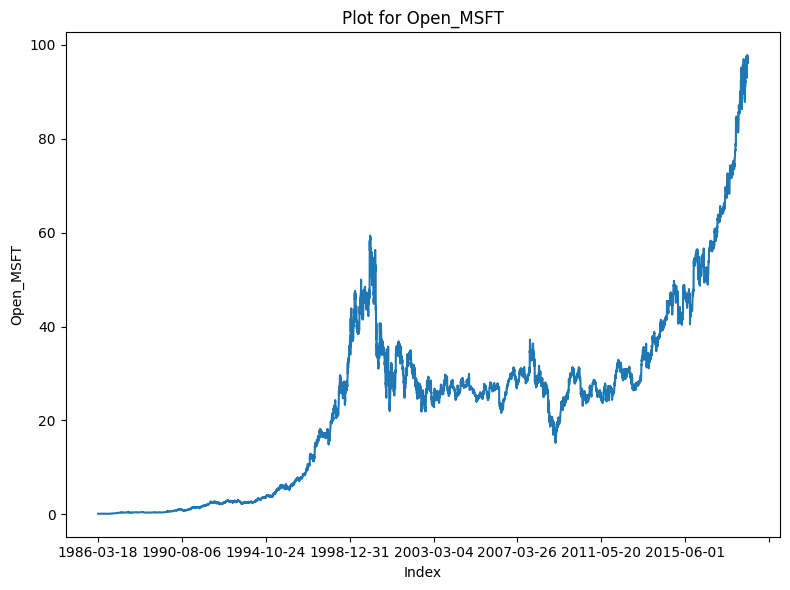

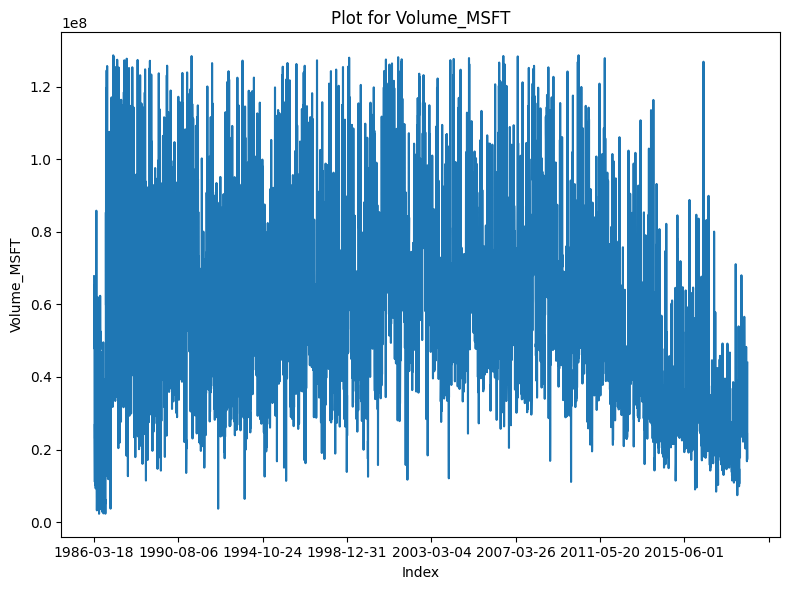

Index(['adj close_msft', 'close_msft', 'high_msft', 'low_msft', 'open_msft',
       'volume_msft'],
      dtype='object')
Index Name: date


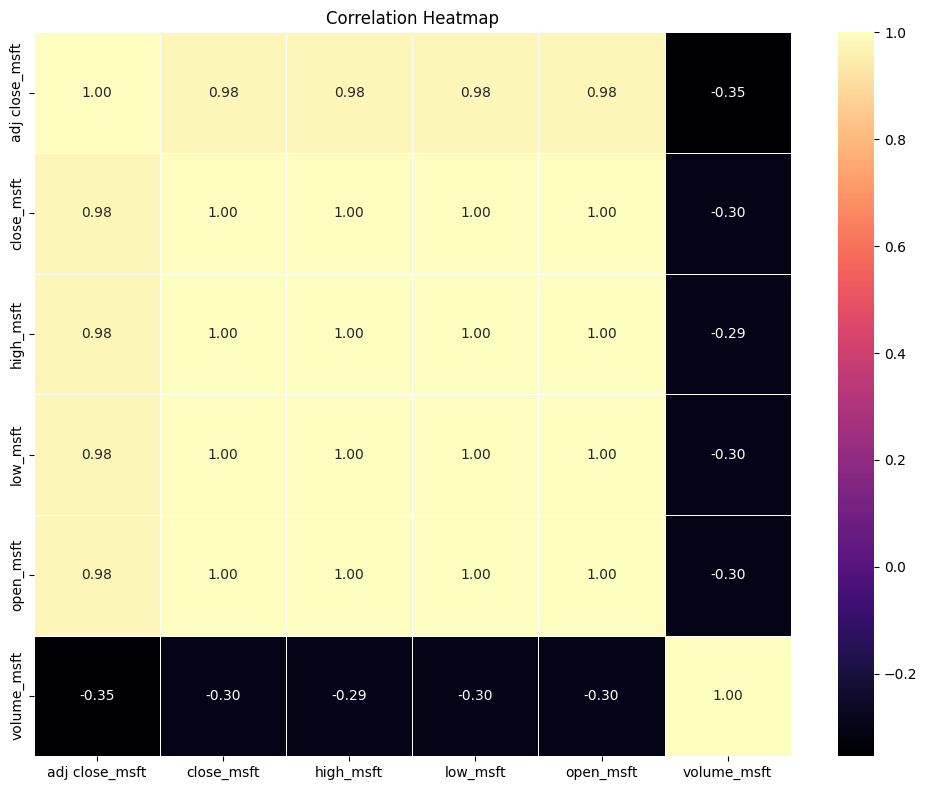

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = 'microsoft_stock.csv' 
df = pd.read_csv(data, header=[0, 1], index_col=0) 

df.columns
df.columns = [col[1] if 'Unnamed' in col[0] else f"{col[0]}_{col[1]}" for col in df.columns]
print("\nFirst rows of dataset:")
df.head()
print("\nFirst rows of dataset:")
df.head()
df.describe()
df.info()

columns_to_analyze = ['Adj Close_MSFT', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Volume_MSFT']

plt.figure(figsize=(12, 6))
df[columns_to_analyze].boxplot()
plt.title('Boxplot of Selected Columns (Outliers)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

for column in df.columns:
    plt.figure(figsize=(8, 6))  
    df[column].plot(kind='line') 
    plt.title(f"Plot for {column}") 
    plt.xlabel('Index') 
    plt.ylabel(column)  
    plt.tight_layout()  
    plt.show() 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_no_outliers.info())

plt.figure(figsize=(10, 6))
df_no_outliers.boxplot()
plt.title("Boxplot After Outlier Removal")
plt.ylabel("Values")
plt.show()

for column in df.columns:
    plt.figure(figsize=(8, 6)) 
    df_no_outliers[column].plot(kind='line') 
    plt.title(f"Plot for {column}") 
    plt.xlabel('Index')
    plt.ylabel(column) 
    plt.tight_layout() 
    plt.show()  

df_no_outliers.columns = df_no_outliers.columns.str.lower()

df_no_outliers.index.name = df_no_outliers.index.name.lower()

print(df_no_outliers.columns)  
print("Index Name:", df_no_outliers.index.name) 

corr_matrix = df_no_outliers.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

df_no_outliers.to_csv('MSFT_cleaned_data.csv')